In [1]:
import pandas as pd

# Data

In [3]:
# Read
data = pd.read_csv('output_data/mexico-covid19-2020-04-01.csv')

In [4]:
# To use symptoms again as indicator, uncomment these two lines
# data = data.drop(['Date_Confirmed'], axis=1)
# ata = data.rename(columns={'Date_Symptoms':'Date_Confirmed'}) # Rename index

In [5]:
# Region delta (ie, new cases)
cum_df = (data.groupby(['Region','Date_Confirmed'])['Date_Confirmed'].count()).to_frame()

In [6]:
# Rename because duplicate index
cum_df['Region_Delta'] = cum_df['Date_Confirmed']

In [7]:
# Region cumulative by date
cum_df['Region_Cumulative'] = cum_df.groupby(['Region'])['Region_Delta'].cumsum()

In [8]:
# Clean up
cum_df = cum_df.drop(['Date_Confirmed'], axis=1)

In [9]:
# To view full table:
# from IPython.core.display import HTML
# display(HTML(cum_df.to_html()))

# Tables

In [10]:
pivot_tbl_cum = cum_df.reset_index().pivot('Region','Date_Confirmed','Region_Cumulative').T
pivot_tbl_delta = cum_df.reset_index().pivot('Region','Date_Confirmed','Region_Delta').T.sort_values(by='Date_Confirmed')

In [11]:
pivot_tbl_cum.to_csv('output_data/time_series/ts_mexico_covid19.csv', index=True)
pivot_tbl_delta.fillna(0).to_csv('output_data/time_series/delta_mexico_covid19.csv', index=True)

# Plots

In [12]:
from numpy import *
import math
import matplotlib.pyplot as plt

### Confirmed cases

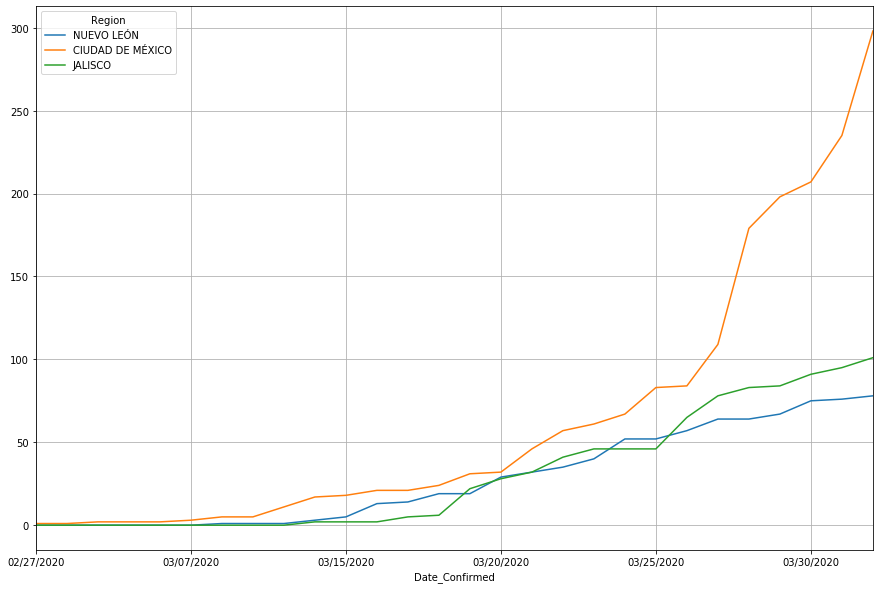

In [13]:
pivot_tbl_delta.fillna(0).cumsum()[['NUEVO LEÓN','CIUDAD DE MÉXICO','JALISCO']].plot(figsize=(15,10)) # Cumulative
plt.grid(True)

Notice there are no dates - all we care is about the growth rate (so each region starts at day 0 from first case).

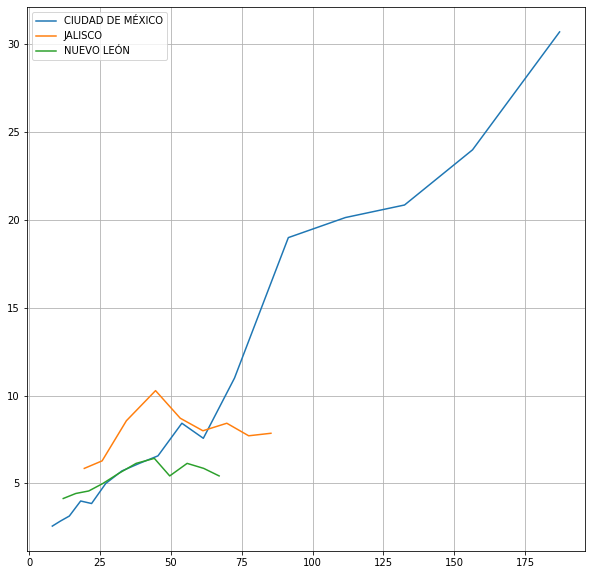

In [14]:
plt.figure(figsize=(10,10))

for state in ['CIUDAD DE MÉXICO','JALISCO','NUEVO LEÓN']:
    plt.plot(list(pivot_tbl_cum[state].dropna().rolling(window=7).mean()), list(pivot_tbl_delta[state].dropna().rolling(window=7).mean()), label=state) # plotting t, c separately 
    # pd.DataFrame(list(pivot_tbl_cum[state].dropna()), list(pivot_tbl_delta[state].dropna())).to_csv('data/output_series/' + state + '.csv')

plt.legend()
plt.yscale('linear')
plt.xscale('linear')
plt.grid(True)

plt.show()

### Growth rate (log scale)

Now let's take a look at log scale...

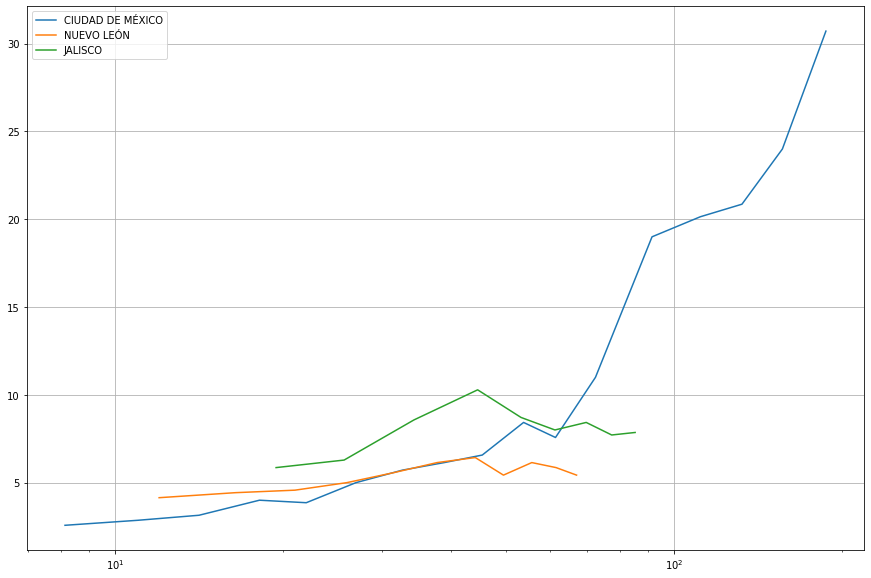

In [15]:
plt.figure(figsize=(15,10))

for state in ['CIUDAD DE MÉXICO', 'NUEVO LEÓN', 'JALISCO']:
    plt.plot(list(pivot_tbl_cum[state].dropna().rolling(window=7).mean()), list(pivot_tbl_delta[state].dropna().rolling(window=7).mean()), label = state) # plotting t, c separately 
    # pd.DataFrame(list(pivot_tbl_cum[state].dropna()), list(pivot_tbl_delta[state].dropna())).to_csv('data/output_series/' + state + '.csv')

plt.legend()
plt.yscale('linear')
plt.xscale('log')
plt.grid(True)

plt.show()

### Starting at date w/certain number of cases

Because more comparative? Dunno

In [16]:
def select_min_cases(df, min):
    df2_state = []
    df2_date= []
    df2_cases= []
    for state in df.columns:
        #print(df.columns)
        for index in range(len(df[state])):
            if df[state][index] >= min:
                #print(state)
                #print(df[state].index[index])
                #print((df[state][index]))
                df2_state.append(state)
                df2_date.append(df[state].index[index])
                df2_cases.append(df[state][index])
            #if df[state][index] < num:
                #print(None)
    my_df = pd.DataFrame({'Region': pd.Series(df2_state), 'Date_Confirmed': pd.Series(df2_date), 'Region_Cumulative': pd.Series(df2_cases)})
    #my_df = my_df.set_index(['Region','Date_Confirmed'])
    return my_df

In [17]:
min_cases = select_min_cases(pivot_tbl_cum, 15).reset_index()

In [18]:
min_cases = min_cases.drop(['index'], axis=1).reset_index()

In [19]:
min_cases = min_cases.reset_index().pivot('Region','Date_Confirmed','Region_Cumulative').T.sort_index()

In [20]:
min_cases = min_cases.fillna(method='ffill')

In [21]:
daily_min_cases = min_cases.diff()

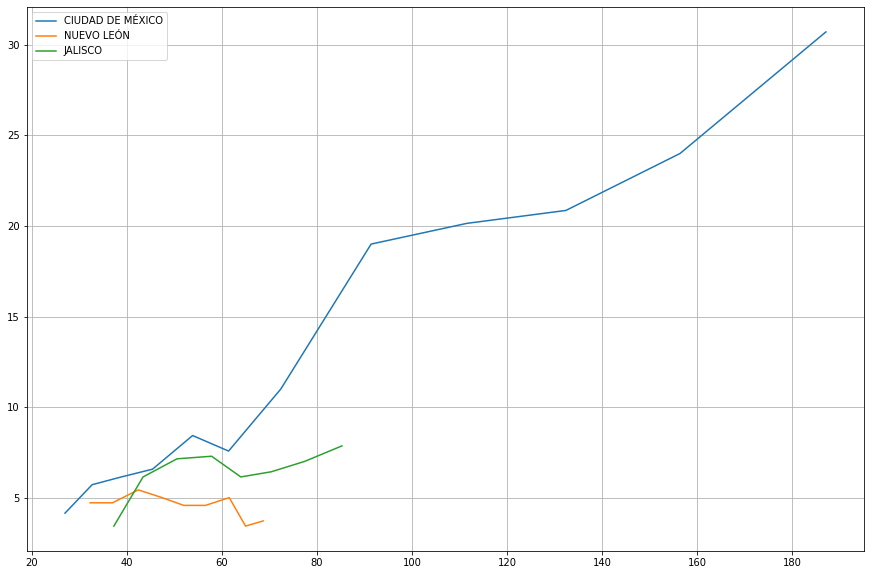

In [22]:
plt.figure(figsize=(15,10))

for state in ['CIUDAD DE MÉXICO', 'NUEVO LEÓN', 'JALISCO']:
    plt.plot(list(min_cases[state].rolling(window=7).mean()), list(daily_min_cases[state].fillna(0).rolling(window=7).mean()), label=state) # plotting t, c separately 
    # pd.DataFrame(list(pivot_tbl_cum[state].dropna()), list(pivot_tbl_delta[state].dropna())).to_csv('data/output_series/' + state + '.csv')

plt.legend()
plt.yscale('linear')
plt.xscale('linear')
plt.grid(True)

plt.show()

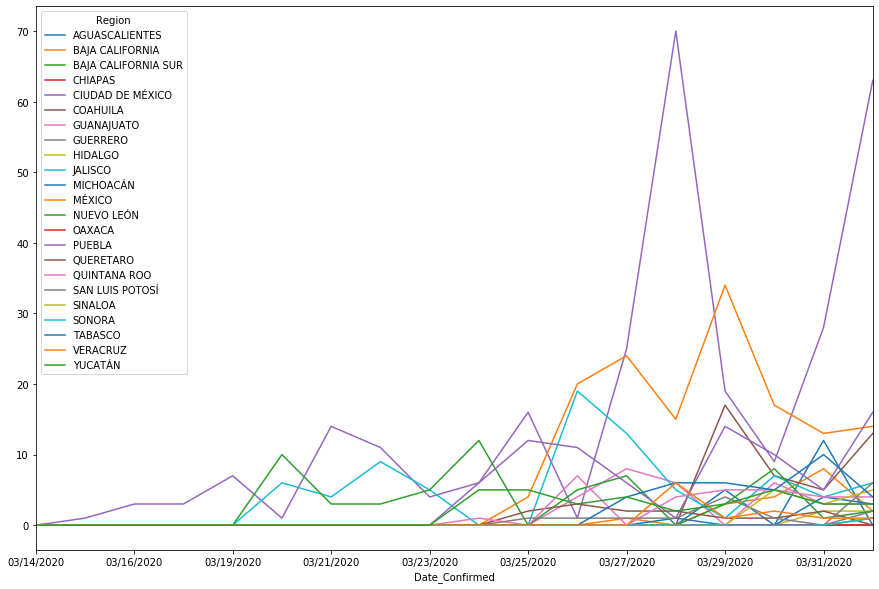

In [23]:
daily_min_cases.fillna(0).plot(figsize=(15,10))
#pivot_tbl_delta.fillna(0).cumsum()[['NUEVO LEÓN','CIUDAD DE MÉXICO','JALISCO']].plot(figsize=(15,10))